# Convolutional neural networks

## Introduction

<b>Convolution</b> is defined as:

$$ (f_1 \ast f_2)(t) = \int_{-\infty}^{\infty} f_1(\tau)f_2(t - \tau)d\tau $$

**discrete convolution** is given by:


$$ (f_1 \ast f_2)[n] = \sum_{m = -\infty}^{\infty} f_1[m]f_2[n - m] $$


Convolution is:

- <b>commutative:</b> $$f_1 \ast f_2 = f_2 \ast f_1 $$

- <b>associative:</b> $$(f_1 \ast f_2)\ast f_3 = f_1 \ast (f_2 \ast f_3)$$

- <b>distributive:</b> $$ (f_1 + f_2) \ast f_3 = f_1 \ast f_3 + f_2 \ast f_3$$

Convolution is a product of one function modified by the other. Intuitively, it is somewhat similar to the weighted average - at each point, values of some function are scaled by the other function at surroundings of that point and then aggregated:

### Cross-correlation, Autocorrelation 

<b>Cross-correlation</b> is a measure related to the convolution and is often used in a similar context. Cross-correlation measures the similarity of two functions as a function of the displacement $\Delta t$:
$$ (f_1 \star f_2)(\Delta t) = \int_{-\infty}^{\infty} f_1(t)f_2(t + \Delta t)d \Delta t $$

and for the discrete cases:


$$ (f_1 \star f_2)[n] = \sum_{m = -\infty}^{\infty} f_1[m]f_2[n + m] $$

<b>Autocorrelation</b> is a special case of the cross-correlation.


[![splot macierzy](https://upload.wikimedia.org/wikipedia/commons/2/21/Comparison_convolution_correlation.svg)](https://en.wikipedia.org/wiki/Cross-correlatxv>20)

## Convolutional Neural Network (CNN)

[![](https://res.mdpi.com/entropy/entropy-19-00242/article_deploy/html/images/entropy-19-00242-g001.png)](https://towardsdatascience.com/how-to-teach-a-computer-to-see-with-convolutional-neural-networks-96c120827cd1)

CNNs contains three successive stages:

#### Convolution

The first step of a convolutional layer is a convolution itself. Data processing, image processing in particular, is based on the [small filters](https://en.wikipedia.org/wiki/Kernel_%28image_processing%29). (**kernels** or **masks**) used to extract or strengthen specific properties of the object. These filters are convolved with a baseline object, giving us the processed result. However, filters must be chosen beforehand; it means that we introduce some form of bias in the data processing step. What if we allow a model to choose proper kernels on its own? 

This is the core property of CNNs. Instead of the predefined kernels such networks use **feature maps** - kernels that are randomly initialized and optimized during the training.

#### Detector stage

By definition, convolution is a linear operation. To improve the predictive power of a network we want to introduce nonlinearity to the model. We achieve that by inputting each data point (e.g. one pixel) into a nonlinear activation function (e.g. ReLU).

#### Pooling

**Pooling** is the final step of a convolutional layer. We could think about it as a "trimming" of the output data:

[![](https://shafeentejani.github.io/assets/images/pooling.gif)](https://towardsdatascience.com/how-to-teach-a-computer-to-see-with-convolutional-neural-networks-96c120827cd1)

Pooling is necessary for the following reasons:
- It reduces the size of the data, simplifying the problem and allowing us to build deeper and less computationally expensive models.
- It is a form of regularization.
- Pooling exploits the stationarity of the objects - it will detect given property in all parts of the picture.
- Because of pooling, the approximation is invariant to local translation.

Most common types of pooling:
- <b>max-pooling</b>
- <b>min-pooling</b>
- <b>mean-pooling</b>

## Why CNNs are so effective?

[Goodfellow, Bengio & Courville, Deep Learning (2016), chapter 9](http://www.deeplearningbook.org/contents/convnets.html)

### Sparse interactions (<i>sparse connectivity</i>)

In traditional multi-layer perceptrons, each input interacts with each output. On the contrary, kernels in convolutional networks are significantly smaller than the input. This means that we need to store fewer parameters, which both reduces the memory requirements of the model and improves its statistical efficiency. 

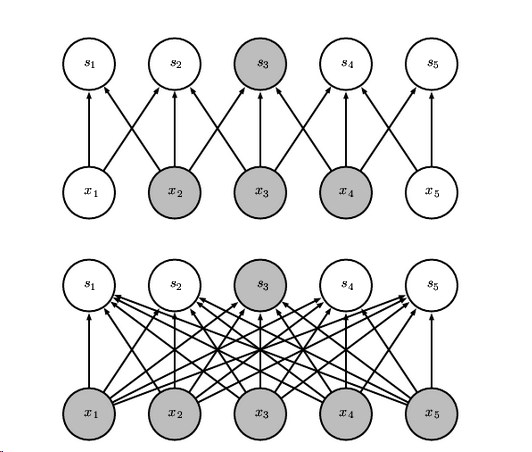

### Parameter sharing:

In a convolutional neural network, each kernel is used at every position of the input, the model learns only one set of parameters (they are **tied**). This property significantly reduces the storage requirements, allowing us to build much more complicated models. 

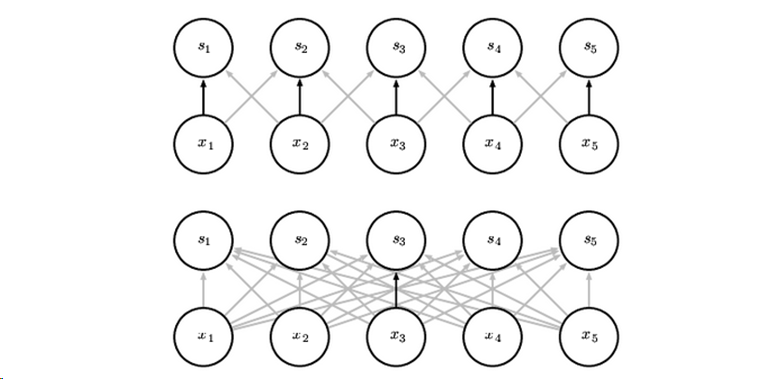

### Equivariance to  translation:

**Equivariance** is defined as:

$$ f(g(I))=g(f(I)) $$

Equivariance means that if the input changes, the output changes in the same way. This property is a direct result of parameter sharing; a feature map capable of detecting a given property will detect such property regardless of its placement in the input. 

### Invariance to local translation.

Invariance is defined as: 

$$ f(g(I))=f(I) $$

This property is a direct result of pooling; because pooling aggregates the responses over a whole neighborhood, it can generalize the outputs despite minor differences. As a result, convolutional networks are able to detect objects that are slightly rotated, have different colors, etc.

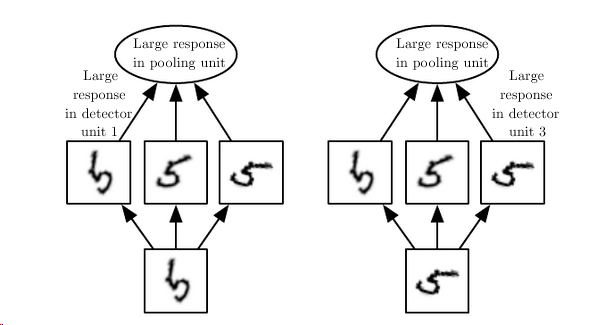